In [3]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

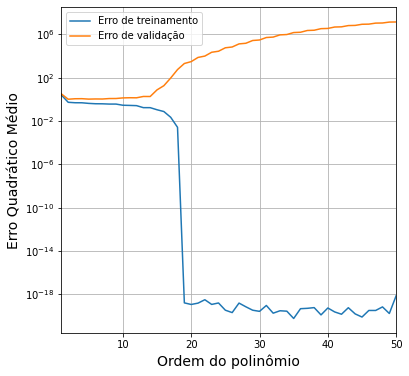

In [4]:
# Example set size.
M = 20

np.random.seed(42)

def target_function(M, x1):
    y = 2 + x1 + 0.5*x1**2;
    y_noisy = y + np.random.randn(M, 1)
    return y, y_noisy

# Create target function.
x1 = np.linspace(-3, 3, M).reshape(M, 1)
y, y_noisy = target_function(M, x1)

Mv = 30
x1_test = np.linspace(-3, 3, Mv).reshape(Mv, 1)
y_test, y_noisy_test = target_function(Mv, x1_test)

maxDegree = 50
error_train = []
error_test = []
for d in range(1, maxDegree+1):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    # Perform polynomial regression.
    polynomial_regression.fit(x1, y_noisy)

    # Use the trained model for prediction of the training set.
    y_train_predict = polynomial_regression.predict(x1)
    
    # Use the trained model for prediction of the test set.
    y_test_predict = polynomial_regression.predict(x1_test)    

    error_train.append(mean_squared_error(y_noisy, y_train_predict))
    
    error_test.append(mean_squared_error(y_noisy_test, y_test_predict))

fig = plt.figure(figsize=(6,6))
plt.plot(range(1, maxDegree+1), error_train, label='Erro de treinamento')
plt.plot(range(1, maxDegree+1), error_test, label='Erro de validação')
plt.yscale('log')
plt.xlim([1, maxDegree])
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro Quadrático Médio', fontsize=14)
plt.grid()
plt.legend()
plt.savefig("erro_de_aproximacao.png", dpi=600)

plt.show()